**DATASET**


[link text](https://www.kaggle.com/code/razanihababdellatif/mobile-price-prediction-eda-xgboost-shap)




**https://www.kaggle.com/code/razanihababdellatif/mobile-price-prediction-eda-xgboost-shap **

In [7]:
# Basic imports
import pandas as pd
import numpy as np

In [8]:





# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
import warnings
warnings.filterwarnings('ignore')






In [11]:
# Load the training data
df = pd.read_csv('/content/train.csv')


In [12]:
# Preview the dataset
print("📊 Shape of dataset:", df.shape)
df.head()


📊 Shape of dataset: (2000, 21)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [13]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [14]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


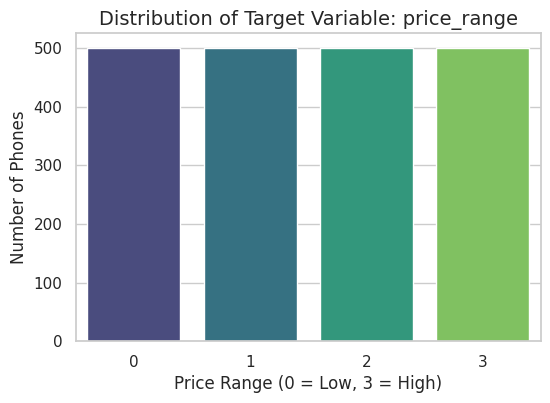

In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(x='price_range', data=df, palette='viridis')
plt.title('Distribution of Target Variable: price_range', fontsize=14)
plt.xlabel('Price Range (0 = Low, 3 = High)')
plt.ylabel('Number of Phones')
plt.show()





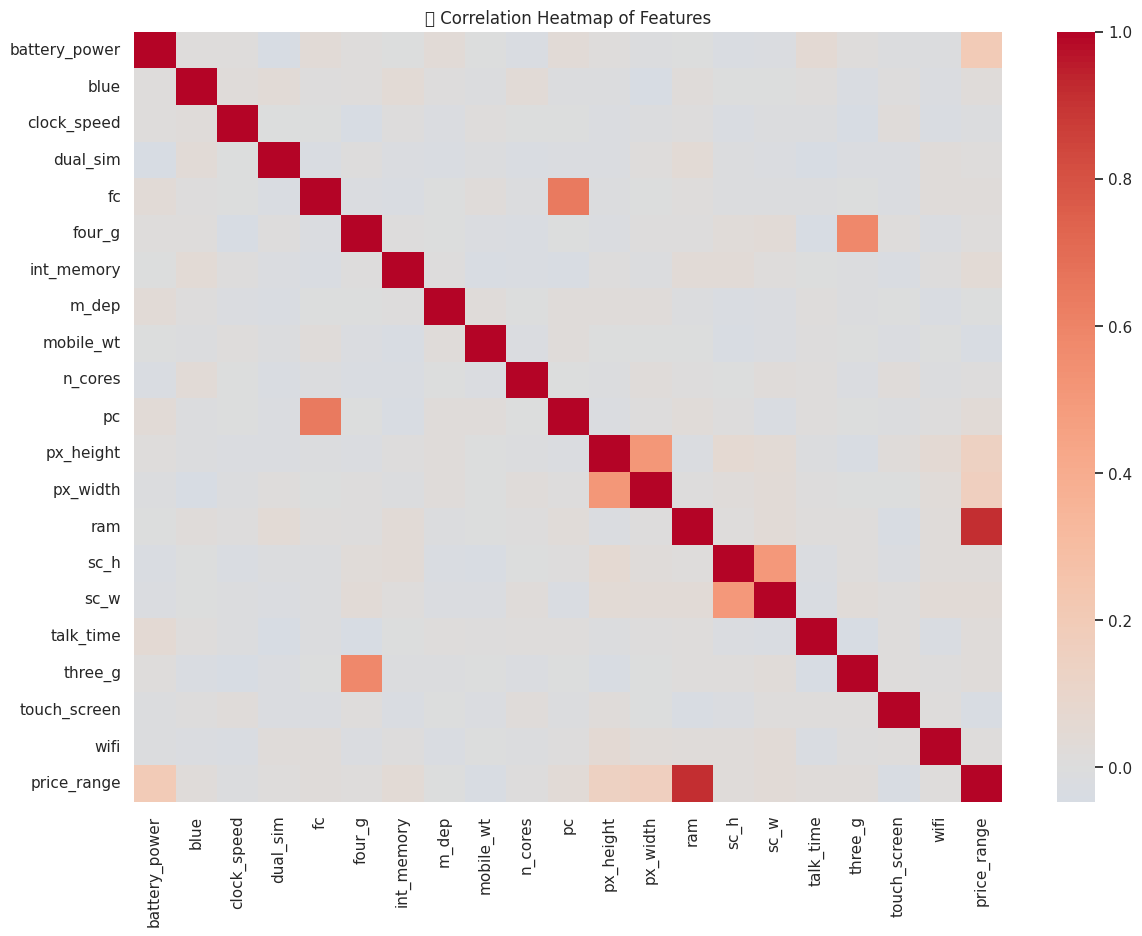

In [16]:
plt.figure(figsize=(14, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, center=0)
plt.title('📈 Correlation Heatmap of Features')
plt.show()

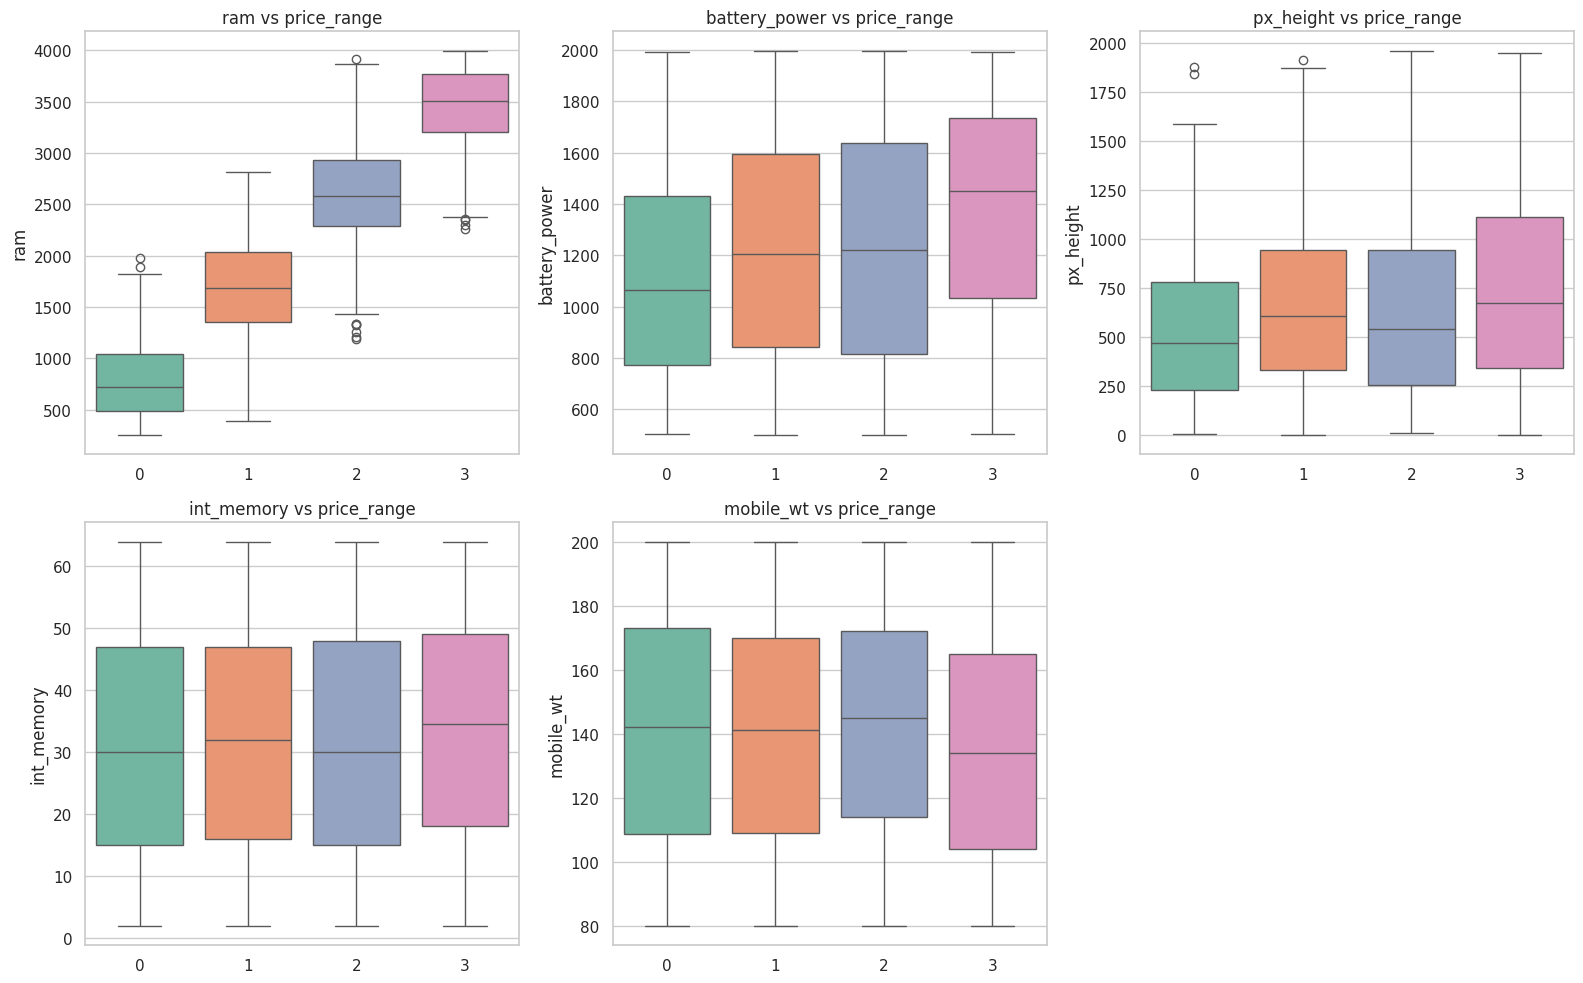

In [17]:
top_features = ['ram', 'battery_power', 'px_height', 'int_memory', 'mobile_wt']

plt.figure(figsize=(16, 10))
for i, feature in enumerate(top_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='price_range', y=feature, data=df, palette='Set2')
    plt.title(f'{feature} vs price_range')
    plt.xlabel('')
plt.tight_layout()
plt.show()





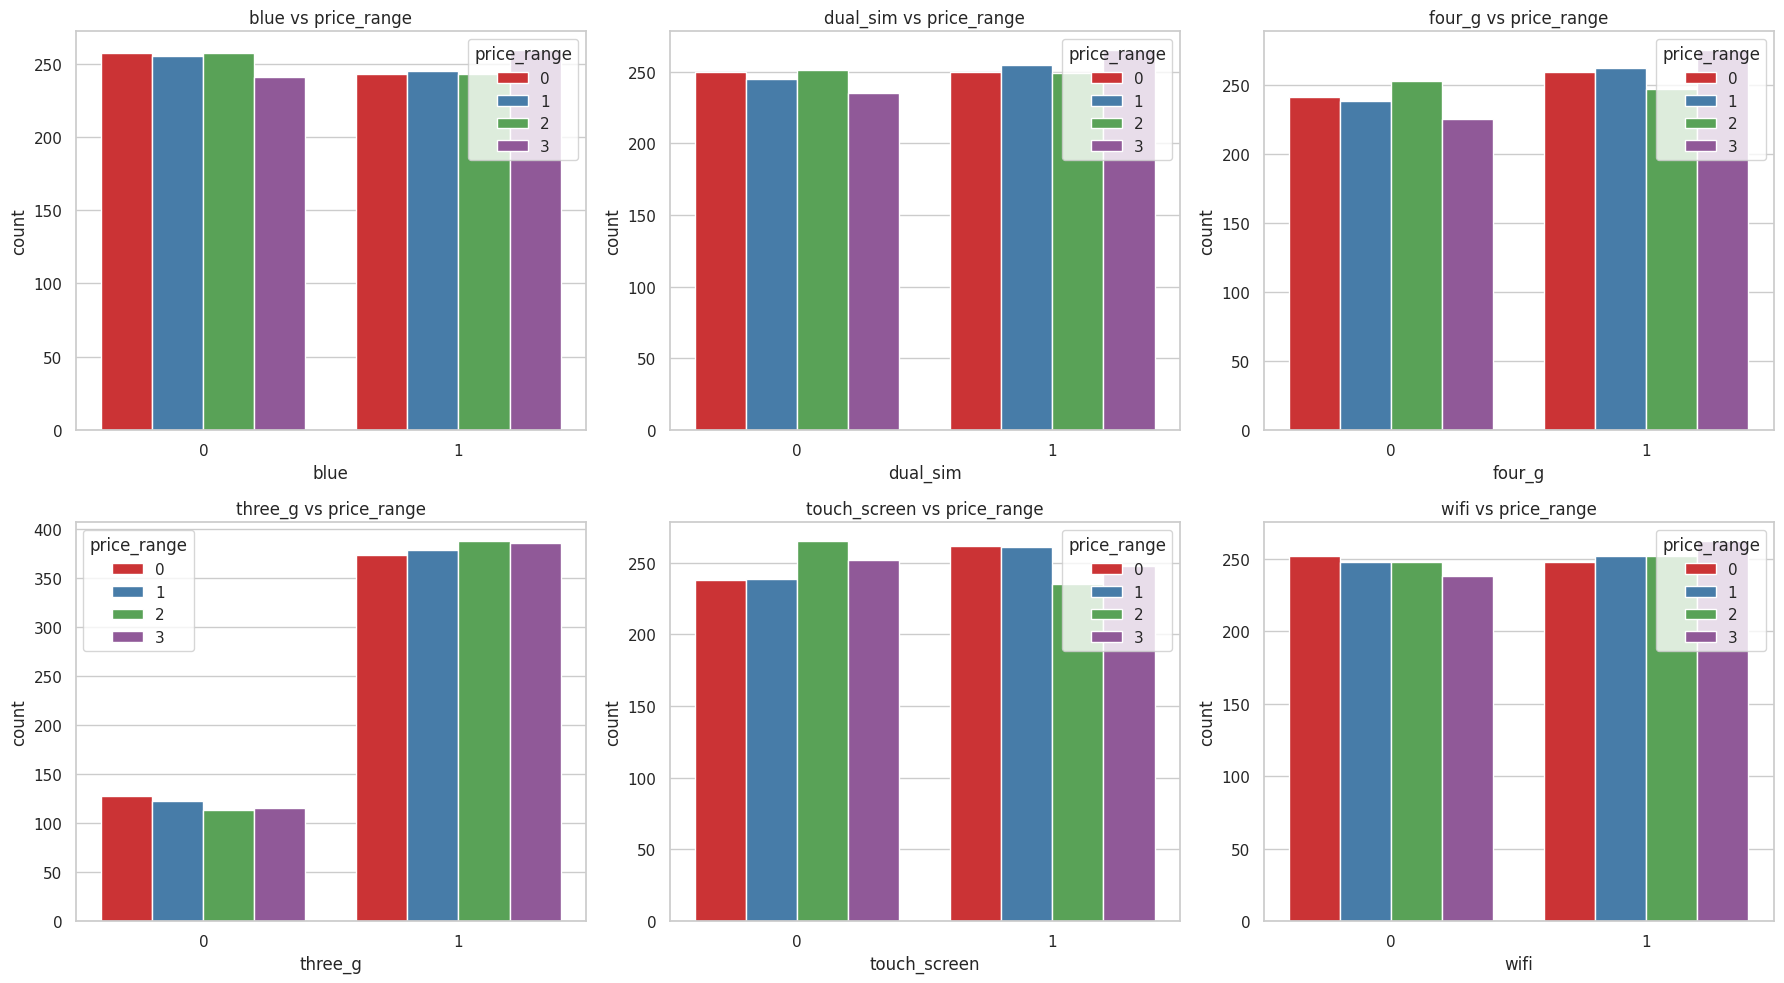

In [18]:




cat_features = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

plt.figure(figsize=(18, 10))
for i, feature in enumerate(cat_features):
    plt.subplot(2, 3, i + 1)
    sns.countplot(x=feature, hue='price_range', data=df, palette='Set1')
    plt.title(f'{feature} vs price_range')
plt.tight_layout()
plt.show()





In [19]:











# Make a copy to avoid changing original
df_fe = df.copy()

# Avoid divide-by-zero errors
df_fe['sc_w'] = df_fe['sc_w'].replace(0, 0.1)
df_fe['mobile_wt'] = df_fe['mobile_wt'].replace(0, 0.1)

# New features
df_fe['screen_area'] = df_fe['sc_h'] * df_fe['sc_w']
df_fe['battery_per_weight'] = df_fe['battery_power'] / df_fe['mobile_wt']
df_fe['ppi'] = np.sqrt(df_fe['px_height']**2 + df_fe['px_width']**2) / df_fe['sc_w']

# Scale
from sklearn.preprocessing import StandardScaler
scale_cols = [
    'battery_power', 'ram', 'int_memory', 'mobile_wt',
    'screen_area', 'battery_per_weight', 'ppi'
]
scaler = StandardScaler()
df_fe[scale_cols] = scaler.fit_transform(df_fe[scale_cols])

# Check for any inf/NaN again (should be none)
print("Any infinities?", np.isinf(df_fe[scale_cols]).any().any())
print("Any NaNs?", df_fe[scale_cols].isna().any().any())

df_fe.head()








Any infinities? False
Any NaNs? False


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,screen_area,battery_per_weight,ppi
0,-0.902597,0,2.2,0,1,0,-1.380644,0.6,1.349249,2,...,9,7.0,19,0,0,1,1,-0.226205,-1.158914,-0.364888
1,-0.495139,1,0.5,1,0,1,1.155024,0.7,-0.120059,3,...,17,3.0,7,1,1,0,2,-0.382644,-0.454090,-0.219946
2,-1.537686,1,0.5,1,2,1,0.493546,0.9,0.134244,5,...,11,2.0,9,1,1,0,2,-0.760707,-1.297607,-0.141113
3,-1.419319,1,2.5,0,0,0,-1.215274,0.8,-0.261339,6,...,16,8.0,11,1,0,0,2,0.621177,-1.108662,-0.327009
4,1.325906,1,1.2,0,13,1,0.658915,0.6,0.021220,2,...,8,2.0,15,1,1,0,1,-0.838927,0.804356,-0.190142


In [21]:














from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Split data
X = df_fe.drop('price_range', axis=1)
y = df_fe['price_range']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Store models and their names
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    print(f"🔍 {name} Results:")
    print("Accuracy:", accuracy_score(y_test, preds))
    print("Classification Report:")
    print(classification_report(y_test, preds))
    print("-" * 50)









🔍 Logistic Regression Results:
Accuracy: 0.855
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       100
           1       0.82      0.80      0.81       100
           2       0.75      0.83      0.79       100
           3       0.92      0.86      0.89       100

    accuracy                           0.85       400
   macro avg       0.86      0.85      0.86       400
weighted avg       0.86      0.85      0.86       400

--------------------------------------------------
🔍 Random Forest Results:
Accuracy: 0.925
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       100
           1       0.92      0.90      0.91       100
           2       0.87      0.89      0.88       100
           3       0.95      0.93      0.94       100

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.92       400


In [22]:













from sklearn.model_selection import RandomizedSearchCV

# Define XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize RandomizedSearchCV
xgb_random = RandomizedSearchCV(
    xgb_model, param_distributions=param_grid,
    n_iter=20, cv=3, scoring='accuracy', verbose=1, n_jobs=-1, random_state=42
)

# Fit on training data
xgb_random.fit(X_train, y_train)

# Best model
best_xgb = xgb_random.best_estimator_

# Evaluate on test set
xgb_preds = best_xgb.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_preds)

print("✅ Best XGBoost Accuracy:", round(xgb_acc, 4))
print("Classification Report:\n", classification_report(y_test, xgb_preds))










Fitting 3 folds for each of 20 candidates, totalling 60 fits
✅ Best XGBoost Accuracy: 0.94
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       100
           1       0.95      0.90      0.92       100
           2       0.91      0.91      0.91       100
           3       0.95      0.96      0.96       100

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



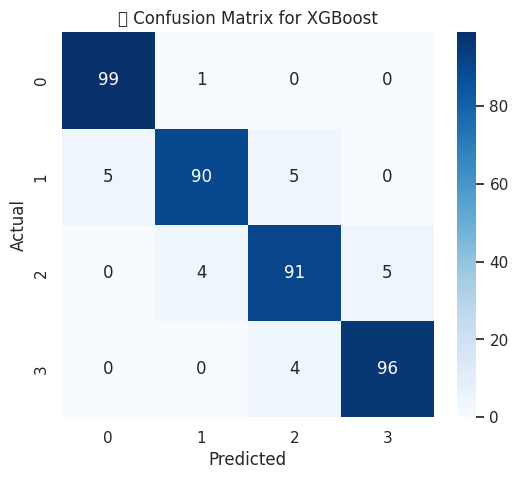

In [23]:







# Confusion matrix
cm = confusion_matrix(y_test, xgb_preds)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1,2,3], yticklabels=[0,1,2,3])
plt.title('🔍 Confusion Matrix for XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()








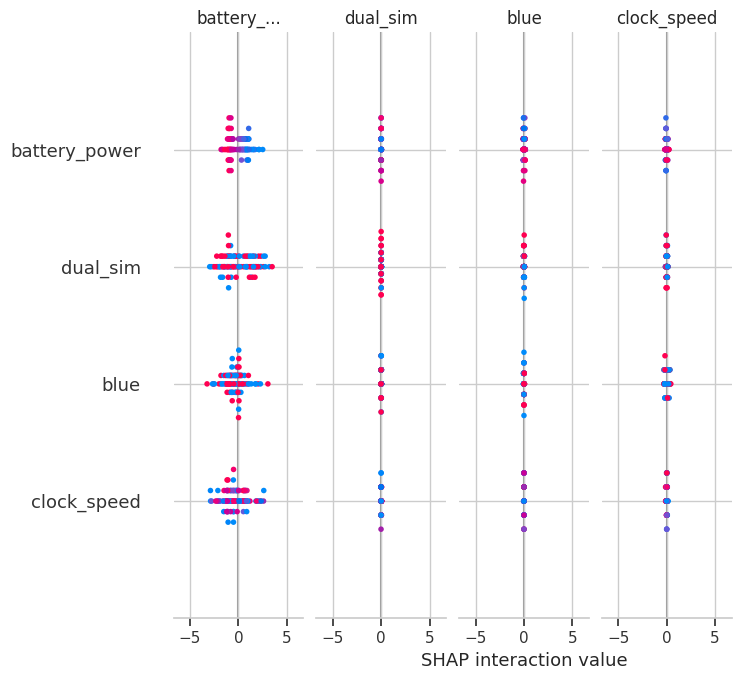

In [24]:









import shap

# Initialize JavaScript for SHAP visualizations
shap.initjs()

# Use TreeExplainer for XGBoost
explainer = shap.TreeExplainer(best_xgb)

# Use a sample to speed up SHAP computation
X_shap = X_test.sample(100, random_state=42)
shap_values = explainer.shap_values(X_shap)

# SHAP Summary Plot (all classes)
shap.summary_plot(shap_values, X_shap)







In [25]:
# Store final metrics
from sklearn.metrics import f1_score

# Define model names and predictions
model_names = ['Logistic Regression', 'Random Forest', 'XGBoost (Tuned)']
preds = [
    models['Logistic Regression'].predict(X_test),
    models['Random Forest'].predict(X_test),
    best_xgb.predict(X_test)
]

# Create a comparison DataFrame
results = pd.DataFrame({
    'Model': model_names,
    'Accuracy': [accuracy_score(y_test, p) for p in preds],
    'F1 Score (Macro)': [f1_score(y_test, p, average='macro') for p in preds]
})

# Sort by F1 Score
results = results.sort_values(by='F1 Score (Macro)', ascending=False)
results.reset_index(drop=True, inplace=True)
results.style.background_gradient(cmap='YlGnBu')




,Model,Accuracy,F1 Score (Macro)
0,XGBoost (Tuned),0.940000,0.939722
1,Random Forest,0.925000,0.924992
2,Logistic Regression,0.855000,0.855963
